# HuggingFace pipelines demo

In [ ]:
%pip install -q transformers requests Pillow matplotlib hf_xet diffusers accelerate safetensors

In [ ]:
import requests
from io import BytesIO
from transformers import pipeline
from PIL import Image, ImageDraw

import matplotlib.pyplot as plt

## Sentiment Analysis

In [ ]:
sentiment_analyzer = pipeline('sentiment-analysis', model="FacebookAI/roberta-large-mnli")

text = "horrible, I will never watch this movie again"
result = sentiment_analyzer(text)

print(result)
print(result[0]['label'])
print(result[0]['score'])

## Text Summarization

In [ ]:
summarizer = pipeline('summarization')

text = """
Hugging Face is an artificial intelligence company based in New York City and Paris. It is most famous for its Transformers library, a Python library for building, training, and deploying models based on the transformer architecture. The library is widely used for natural language processing tasks such as text classification, sentiment analysis, question answering, and text generation. Hugging Face also provides a platform for hosting and sharing machine learning models, datasets, and demos. The company has become a central hub for the open-source AI community, with a focus on democratizing AI through open models and tools.
"""

summary = summarizer(text, max_length=50, min_length=10, do_sample=False)

print(summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


 Hugging Face is an artificial intelligence company based in New York City and Paris . It is most famous for its Transformers library, a Python library for building, training, and deploying models based on the transformer architecture . The company has become a


## Question Answering

In [ ]:
question_answerer = pipeline('question-answering')

context = """
Hugging Face is an artificial intelligence company based in New York City and Paris. It is most famous for its Transformers library, a Python library for building, training, and deploying models based on the transformer architecture. The library is widely used for natural language processing tasks such as text classification, sentiment analysis, question answering, and text generation. Hugging Face also provides a platform for hosting and sharing machine learning models, datasets, and demos. The company has become a central hub for the open-source AI community, with a focus on democratizing AI through open models and tools.
"""
question = "Where is Hugging Face based?"

answer = question_answerer(question=question, context=context)

print(answer)

## Named Entity Recognition (NER)

In [ ]:
ner_pipeline = pipeline('ner', grouped_entities=True)

text = "Apple is a company located in New York City and Paris but I like Oranges more"

entities = ner_pipeline(text)

print(entities)

## Text Generation

In [ ]:
text_generator = pipeline('text-generation')

prompt = "The quick brown fox jumps over the lazy"

generated_text = text_generator(prompt, max_length=30, num_return_sequences=1)

print(generated_text[0]['generated_text'])

## Image classification

In [ ]:
image_classifier = pipeline("image-classification")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

classification_results = image_classifier(image)


plt.imshow(image)
plt.axis("off")
plt.show()


for classes in classification_results[:2]:
  print(classes['label'], classes['score'])

## Object Detection

In [ ]:
object_detector = pipeline("object-detection")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

detection_results = object_detector(image)
print(detection_results)

draw = ImageDraw.Draw(image)
for obj in detection_results:
    box = obj["box"]
    label = obj["label"]
    score = obj["score"]

    # Draw rectangle
    draw.rectangle(
        [(box["xmin"], box["ymin"]), (box["xmax"], box["ymax"])],
        outline="blue", width=7
    )
    # Add label + score
    draw.text((box["xmin"], box["ymin"] - 10), f"{label} ({score:.2f})", fill="red")


plt.imshow(image)
plt.axis("off")
plt.show()

## Image Segmentation

In [ ]:
image_segmentor = pipeline("image-segmentation")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

segmentation_results = image_segmentor(image)
print(segmentation_results)

plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()

plt.figure(figsize=(12, 12))
for i, result in enumerate(segmentation_results):
    mask = result["mask"]  # segmentation mask
    label = result["label"]
    plt.subplot(1, len(segmentation_results), i+1)
    plt.imshow(mask)
    plt.axis("off")
    plt.title(label)

plt.show()

## Translation

In [ ]:
translator = pipeline('translation', model='Helsinki-NLP/opus-mt-en-fr')

english_text = "Hello, how are you today?"

translated_text = translator(english_text)

print(translated_text)

## Zero-Shot Classification

In [ ]:
zero_shot_classifier = pipeline('zero-shot-classification')

sequence_to_classify = "This is a great movie about the future of AI."

candidate_labels = ["politics", "technology", "entertainment", "business"]

classification_results = zero_shot_classifier(sequence_to_classify, candidate_labels)

print(classification_results)

## Image Captioning

In [ ]:
image_captioner = pipeline('image-to-text', model="Salesforce/blip-image-captioning-base")
print("Image-to-text pipeline loaded.")

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"

response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

caption_results = image_captioner(image)
print("Generated Caption:", caption_results)

plt.imshow(image)
plt.axis("off")
plt.title(caption_results[0]["generated_text"], fontsize=12, color="blue")
plt.show()

## Image generation with diffusion models

## Assignment: Image Generation with Diffusion Models

For this assignment, you will explore the use of diffusion models for image generation using the Hugging Face `transformers` library.

Take any model from https://huggingface.co/stabilityai

**Task:**

1.  **Choose a Diffusion Model:** Select a diffusion model available on the Hugging Face Hub. You can explore models from popular libraries like `diffusers`.
2.  **Load the Pipeline:** Load the appropriate pipeline for image generation using the chosen diffusion model.
3.  **Generate Images:** Generate one or more images using the pipeline with different prompts and parameters.
4.  **Display and Discuss:** Display the generated images and write a brief discussion about:
    *   The model you chose and why.
    *   The prompts and parameters you used for generation.
    *   Your observations about the quality and characteristics of the generated images.
    *   Any challenges or interesting findings you encountered.

**Requirements:**

*   Your code should be in a new code cell following this markdown section.
*   Clearly indicate the model you are using in your code or discussion.
*   Use `matplotlib` or other appropriate libraries to display the generated images within the notebook.
*   Provide a clear and concise discussion of your work in a markdown cell below the code.

This assignment will give you hands-on experience with state-of-the-art image generation techniques using the powerful tools provided by Hugging Face.

In [1]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-base")
print("Text-to-Image pipeline loaded.")

prompt = "A fantasy landscape with castles and dragons"
image_results = pipe(prompt, num_inference_steps=25)
print("Generated Image for the prompt:", prompt)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Text-to-Image pipeline loaded.


  0%|          | 0/25 [00:00<?, ?it/s]

Generated Image for the prompt: A fantasy landscape with castles and dragons


In [3]:
import matplotlib.pyplot as plt

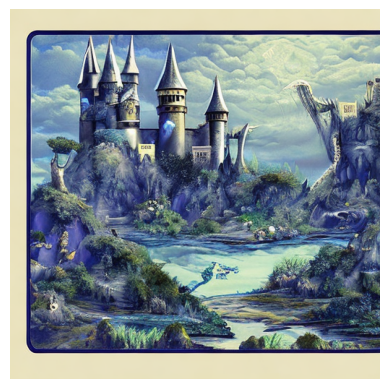

In [5]:
plt.imshow(image_results.images[0])
plt.axis("off")
plt.show()

In [6]:
# Save the generated image as a JPG file
image_results.images[0].save("generated_image.jpg")
print("Image saved as generated_image.jpg")

Image saved as generated_image.jpg
